<a href="https://colab.research.google.com/github/sunxueliang96/IP_tracker/blob/master/single_dateset_(DNN_CNN_LSTM_CNN%2BLSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Mount Google Drive as folder
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd /content/drive/'My Drive'/datasets/no_paded/close_world/walkiebatch

/content/drive/My Drive/datasets/no_paded/close_world/walkiebatch


In [4]:
ls

X_walkiebatch.pkl  y_walkiebatch.pkl


In [5]:
import numpy as np
import pickle
print('loading data...')
with open('X_walkiebatch.pkl','rb') as handle:
  X = np.array(pickle.load(handle))
with open('y_walkiebatch.pkl','rb') as handle:
  y = np.array(pickle.load(handle))
print('the shape of X',X.shape)
print('the shape of y',y.shape)


loading data...
the shape of X (11868,)
the shape of y (11868,)


In [0]:
import math 
import random
def creat_data(X,y,PERCENT_NOISE,NB_TIMES):        #Magnificate dataset by adding noising 
    X = list(X)
    y = list(y)
    PERCENT_NOISE = PERCENT_NOISE                  #PERCENT of Noise at each time
    NB_TIMES = NB_TIMES                            #TIMES of Magnification
    X_sum = X.copy()
    y_sum = y.copy()
    print("{} samples has beed add to X_train, {}% of noise for each sample".format(math.ceil(len(X)*NB_TIMES),PERCENT_NOISE))
    for i in range(math.ceil(len(X)*NB_TIMES)):
        p = random.choice(range(len(X)))
        X_new = X[p].copy()
        y_new = y[p]
        for n in range(math.ceil(PERCENT_NOISE*len(X_new)/100)):#dealing X_new
            noise = random.choice([1,-1])       #noise could only be 1 or -1
            pos = random.choice(range(len(X_new)))  #position belong to (0,len(sequence))
            X_new.insert(pos,noise)
            #print('insert {} at position {} in sequence {} now len of sequence is {}'.format(noise,pos,p,len(X_new))) #for test
        X_sum.append(X_new)
        y_sum.append(y_new)
    return np.array(X_sum),np.array(y_sum)                        #return two array of X, y 

    '''
def locally_change(X,y,PERCENT_CHANGE,METHOD):                               
    X = list(X)
    y = list(y)
    PERCENT_NOISE = PERCENT_NOISE                  #PERCENT of Changing
    NB_TIMES = METHOD                              #Method of Changing
    X_sum = X.copy()
    y_sum = y.copy()

    for i in range(math.ceil(len(X)*NB_TIMES)):
        p = random.choice(range(len(X)))
        #print('###########################################',p)
        X_new = X[p].copy()
        y_new = y[p]
        for n in range(math.ceil(NB_TIMES*len(X_new)/100)):#dealing X_new
            noise = random.choice([1,-1])       #noise could only be 1 or -1
            pos = random.choice(range(len(X_new)))  #position belong to (0,len(sequence))
            X_new.insert(pos,noise)
            #print('insert {} at position {} in sequence {} now len of sequence is {}'.format(noise,pos,p,len(X_new))) #for test
        X_sum.append(X_new)
        y_sum.append(y_new)
    return np.array(X_sum),np.array(y_sum)                        #return two array of X, y         
    #return x,y
def locally_delete():                                
    pass
def rnn_padding():                                  #a seq to seq model
    pass
def bayes_padding():
    pass
def mult_scale_windowing():
    pass
def GAN_padding():
    pass
def data_mixing():
    pass
    '''

In [7]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.preprocessing import sequence
from collections import Counter
#CLASSES_KNN = 101########################################################################################################################################################################################################
#CLASSES_WAKIE = 100########################################################################################################################################################################################################
MAXLEN_KNN = 2000
MAXLEN_WAKIE =5000

maxlen = 5000
NB_CLASSES = 0

def choose():
    global maxlen,NB_CLASSES
    print('if padding, the max of length of seq is {}'.format(maxlen))
    NB_CLASSES = len(Counter(y).keys())
    print('number of classes is {}'.format(NB_CLASSES))

choose()################################################################################################################################################################################################################

#print('spliting data...')
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
#X_train,y_train = creat_data(X_train,y_train,PERCENT_NOISE=0.5,NB_TIMES=1)

#print(len(X_train), 'train sequences')
#print(len(y_train), 'test sequences')
print('Average sequence length: {}'.format(np.mean(list(map(len, X)), dtype=int)))


Using TensorFlow backend.


if padding, the max of length of seq is 5000
number of classes is 108
Average sequence length: 4471


In [0]:
#FCN
from keras import Sequential
from keras.layers.core import Activation, Flatten, Dense, Dropout
from keras.optimizers import Adamax

def DNN(input_shape, classes):
    model = Sequential()
    model.add(Dense(128, input_shape=(input_shape,)))
    model.add(Activation('relu'))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(Dense(classes))
    model.add(Activation('softmax'))
    return model
def run_DNN(X_train,y_train,X_test,y_test):
    print('Pad sequences to ',maxlen)
    x_train = X_train[:]
    x_test = X_test[:]
    x_train = sequence.pad_sequences(x_train, maxlen=maxlen,padding='post',truncating='post')
    x_test = sequence.pad_sequences(x_test, maxlen=maxlen,padding='post',truncating='post')
    y_train = np_utils.to_categorical(y_train, NB_CLASSES)
    y_test = np_utils.to_categorical(y_test, NB_CLASSES)
    print('the shape of x_train',x_train.shape)
    print('the shape of y_train',y_train.shape)
    print('the shape of x_test',x_test.shape)
    print('the shape of y_test',y_test.shape)
    model_DNN = DNN(maxlen,NB_CLASSES)
    #model_DNN.summary()
    model_DNN.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy', precision, recall, fmeasure])
    history = model_DNN.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=NB_EPOCH,validation_data=(x_test,y_test),verbose=VERBOSE)
    score = model_DNN.evaluate(x_test,y_test,verbose=VERBOSE)
    #print(history.history)
    #print(score)
    return(history.history)

In [0]:
#CNN
from keras import Input,Model,Sequential
from keras.layers import Embedding,GlobalAveragePooling1D,Dense,Dropout
from keras.layers import Conv1D, MaxPooling1D, BatchNormalization
from keras.layers.core import Activation, Flatten, Dense, Dropout
from keras.layers.advanced_activations import ELU
from keras.initializers import glorot_uniform
from keras.optimizers import Adamax
def CNN(input_shape, classes):
    model = Sequential()
    #Block1
    filter_num = ['None',32,64,128,256]
    kernel_size = ['None',8,8,8,8]
    conv_stride_size = ['None',1,1,1,1]
    pool_stride_size = ['None',4,4,4,4]
    pool_size = ['None',8,8,8,8]

    model.add(Conv1D(filters=filter_num[1], kernel_size=kernel_size[1], input_shape=(input_shape,1),
                      strides=conv_stride_size[1], padding='same',
                      name='block1_conv1'))
    model.add(BatchNormalization(axis=-1))
    model.add(ELU(alpha=1.0, name='block1_adv_act1'))
    model.add(Conv1D(filters=filter_num[1], kernel_size=kernel_size[1],
                      strides=conv_stride_size[1], padding='same',
                      name='block1_conv2'))
    model.add(BatchNormalization(axis=-1))
    model.add(ELU(alpha=1.0, name='block1_adv_act2'))
    model.add(MaxPooling1D(pool_size=pool_size[1], strides=pool_stride_size[1],
                            padding='same', name='block1_pool'))
    model.add(Dropout(0.1, name='block1_dropout'))

    model.add(Conv1D(filters=filter_num[2], kernel_size=kernel_size[2],
                      strides=conv_stride_size[2], padding='same',
                      name='block2_conv1'))
    model.add(BatchNormalization())
    model.add(Activation('relu', name='block2_act1'))

    model.add(Conv1D(filters=filter_num[2], kernel_size=kernel_size[2],
                      strides=conv_stride_size[2], padding='same',
                      name='block2_conv2'))
    model.add(BatchNormalization())
    model.add(Activation('relu', name='block2_act2'))
    model.add(MaxPooling1D(pool_size=pool_size[2], strides=pool_stride_size[3],
                            padding='same', name='block2_pool'))
    model.add(Dropout(0.1, name='block2_dropout'))

    model.add(Conv1D(filters=filter_num[3], kernel_size=kernel_size[3],
                      strides=conv_stride_size[3], padding='same',
                      name='block3_conv1'))
    model.add(BatchNormalization())
    model.add(Activation('relu', name='block3_act1'))
    model.add(Conv1D(filters=filter_num[3], kernel_size=kernel_size[3],
                      strides=conv_stride_size[3], padding='same',
                      name='block3_conv2'))
    model.add(BatchNormalization())
    model.add(Activation('relu', name='block3_act2'))
    model.add(MaxPooling1D(pool_size=pool_size[3], strides=pool_stride_size[3],
                            padding='same', name='block3_pool'))
    model.add(Dropout(0.1, name='block3_dropout'))

    model.add(Conv1D(filters=filter_num[4], kernel_size=kernel_size[4],
                      strides=conv_stride_size[4], padding='same',
                      name='block4_conv1'))
    model.add(BatchNormalization())
    model.add(Activation('relu', name='block4_act1'))
    model.add(Conv1D(filters=filter_num[4], kernel_size=kernel_size[4],
                      strides=conv_stride_size[4], padding='same',
                      name='block4_conv2'))
    model.add(BatchNormalization())
    model.add(Activation('relu', name='block4_act2'))
    model.add(MaxPooling1D(pool_size=pool_size[4], strides=pool_stride_size[4],
                            padding='same', name='block4_pool'))
    model.add(Dropout(0.1, name='block4_dropout'))

    model.add(Flatten(name='flatten'))
    model.add(Dense(512, kernel_initializer=glorot_uniform(seed=0), name='fc1'))
    model.add(BatchNormalization())
    model.add(Activation('relu', name='fc1_act'))

    model.add(Dropout(0.7, name='fc1_dropout'))

    model.add(Dense(512, kernel_initializer=glorot_uniform(seed=0), name='fc2'))
    model.add(BatchNormalization())
    model.add(Activation('relu', name='fc2_act'))

    model.add(Dropout(0.5, name='fc2_dropout'))

    model.add(Dense(classes, kernel_initializer=glorot_uniform(seed=0), name='fc3'))
    model.add(Activation('softmax', name="softmax"))
    return model
def run_CNN(X_train,y_train,X_test,y_test):
    print('Pad sequences to ',maxlen)
    x_train = X_train[:]
    x_test = X_test[:]
    x_train = sequence.pad_sequences(x_train, maxlen=maxlen,padding='post',truncating='post')
    x_test = sequence.pad_sequences(x_test, maxlen=maxlen,padding='post',truncating='post')
    x_train = x_train[:,:,np.newaxis]
    x_test = x_test[:,:,np.newaxis]
    y_train = np_utils.to_categorical(y_train, NB_CLASSES)
    y_test = np_utils.to_categorical(y_test, NB_CLASSES)
    print('the shape of x_train',x_train.shape)
    print('the shape of y_train',y_train.shape)
    print('the shape of x_test',x_test.shape)
    print('the shape of y_test',y_test.shape)
    model_CNN = CNN(maxlen,NB_CLASSES)
    #model_CNN.summary()
    model_CNN.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy', precision, recall, fmeasure])
    history = model_CNN.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=NB_EPOCH,validation_data=(x_test,y_test),verbose=VERBOSE)
    score = model_CNN.evaluate(x_test,y_test,verbose=VERBOSE)
    #print(score)
    return(history.history)

In [0]:
#LSTM
from keras import Input,Model,Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, TimeDistributed
from keras.layers.convolutional import Conv1D,MaxPooling1D
from keras.layers.core import Activation, Flatten, Dense
from keras.layers.advanced_activations import ELU
from keras.initializers import glorot_uniform
from keras.optimizers import Adamax
def LSTM(input_shape, classes):
    model = Sequential()
    model.add(LSTM(128, input_shape=(input_shape,1),return_sequence=True))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(LSTM(256,return_sequence=True))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(LSTM(512,return_sequence=True))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(classes, activation='softmax'))
    return model

def run_LSTM(X_train,y_train,X_test,y_test):
    print('Pad sequences to ',maxlen)
    x_train = X_train[:]
    x_test = X_test[:]
    x_train = sequence.pad_sequences(x_train, maxlen=maxlen,padding='post',truncating='post')
    x_test = sequence.pad_sequences(x_test, maxlen=maxlen,padding='post',truncating='post')
    x_train = x_train[:,:,np.newaxis]
    x_test = x_test[:,:,np.newaxis]
    print('the shape of x_train',x_train.shape)
    print('the shape of y_train',y_train.shape)
    print('the shape of x_test',x_test.shape)
    print('the shape of y_test',y_test.shape)
    model_LSTM = LSTM(maxlen,NB_CLASSES)
    #model_LSTM.summary()
    model_LSTM.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy', precision, recall, fmeasure])
    history = model_LSTM.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=NB_EPOCH,validation_data=(x_test,y_test),verbose=VERBOSE)
    score = model_LSTM.evaluate(x_test,y_test,verbose=VERBOSE)
    return(history.history)

In [0]:
#CNN+LSTM
from keras import Input,Model,Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, TimeDistributed,BatchNormalization
from keras.layers.convolutional import Conv1D,MaxPooling1D
from keras.layers.core import Activation, Flatten, Dense
from keras.layers.advanced_activations import ELU
from keras.initializers import glorot_uniform
from keras.optimizers import Adamax

def CNN_LSTM(n_features,NB_SPLIT,classes):
    model = Sequential()
    '''
    model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'),input_shape=(None,n_features//NB_SPLIT,1)))
    model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))
    model.add(TimeDistributed(Dropout(0.5)))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(256))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(classes, activation='softmax'))
    '''
    model = Sequential()
    #Block1
    filter_num = ['None',32,64,128,256]
    kernel_size = ['None',8,8,8,8]
    conv_stride_size = ['None',1,1,1,1]
    pool_stride_size = ['None',4,4,4,4]
    pool_size = ['None',8,8,8,8]
    model.add(TimeDistributed(Conv1D(filters=filter_num[1], kernel_size=kernel_size[1], input_shape=(None,n_features//NB_SPLIT,1),
                      strides=conv_stride_size[1], padding='same',
                      name='block1_conv1')))
    model.add(TimeDistributed(BatchNormalization(axis=-1)))
    model.add(TimeDistributed(ELU(alpha=1.0, name='block1_adv_act1')))
    model.add(TimeDistributed(Conv1D(filters=filter_num[1], kernel_size=kernel_size[1],
                      strides=conv_stride_size[1], padding='same',
                      name='block1_conv2')))
    model.add(TimeDistributed(BatchNormalization(axis=-1)))
    model.add(TimeDistributed(ELU(alpha=1.0, name='block1_adv_act2')))
    model.add(TimeDistributed(MaxPooling1D(pool_size=pool_size[1], strides=pool_stride_size[1],
                            padding='same', name='block1_pool')))
    model.add(TimeDistributed(Dropout(0.1, name='block1_dropout')))

    model.add(TimeDistributed(Conv1D(filters=filter_num[2], kernel_size=kernel_size[2],
                      strides=conv_stride_size[2], padding='same',
                      name='block2_conv1')))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(Activation('relu', name='block2_act1')))

    model.add(TimeDistributed(Conv1D(filters=filter_num[2], kernel_size=kernel_size[2],
                      strides=conv_stride_size[2], padding='same',
                      name='block2_conv2')))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(Activation('relu', name='block2_act2')))
    model.add(TimeDistributed(MaxPooling1D(pool_size=pool_size[2], strides=pool_stride_size[3],
                            padding='same', name='block2_pool')))
    model.add(TimeDistributed(Dropout(0.1, name='block2_dropout')))

    model.add(TimeDistributed(Conv1D(filters=filter_num[3], kernel_size=kernel_size[3],
                      strides=conv_stride_size[3], padding='same',
                      name='block3_conv1')))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(Activation('relu', name='block3_act1')))
    model.add(TimeDistributed(Conv1D(filters=filter_num[3], kernel_size=kernel_size[3],
                      strides=conv_stride_size[3], padding='same',
                      name='block3_conv2')))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(Activation('relu', name='block3_act2')))
    model.add(TimeDistributed(MaxPooling1D(pool_size=pool_size[3], strides=pool_stride_size[3],
                            padding='same', name='block3_pool')))
    model.add(TimeDistributed(Dropout(0.1, name='block3_dropout')))

    model.add(TimeDistributed(Conv1D(filters=filter_num[4], kernel_size=kernel_size[4],
                      strides=conv_stride_size[4], padding='same',
                      name='block4_conv1')))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(Activation('relu', name='block4_act1')))
    model.add(TimeDistributed(Conv1D(filters=filter_num[4], kernel_size=kernel_size[4],
                      strides=conv_stride_size[4], padding='same',
                      name='block4_conv2')))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(Activation('relu', name='block4_act2')))
    model.add(TimeDistributed(MaxPooling1D(pool_size=pool_size[4], strides=pool_stride_size[4],
                            padding='same', name='block4_pool')))
    model.add(TimeDistributed(Dropout(0.1, name='block4_dropout')))
    model.add(TimeDistributed(Flatten(name='flatten')))
    model.add(LSTM(256,return_sequence=True))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(LSTM(512,return_sequence=True))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(classes, activation='softmax'))
    return model

def run_CNN_LSTM(X_train,y_train,X_test,y_test):
    print('Pad sequences to ',maxlen)
    x_train = X_train[:]
    x_test = X_test[:]
    x_train = sequence.pad_sequences(x_train, maxlen=maxlen,padding='post',truncating='post')
    x_test = sequence.pad_sequences(x_test, maxlen=maxlen,padding='post',truncating='post')
    x_train = x_train.reshape(x_train.shape[0],NB_SPLIT,maxlen//NB_SPLIT,1)# 把他拆分成n个子序列，每个子序列分别交给CNN去处理，
    x_test = x_test.reshape(x_test.shape[0],NB_SPLIT,maxlen//NB_SPLIT,1)
    print('the shape of x_train',x_train.shape)
    print('the shape of y_train',y_train.shape)
    print('the shape of x_test',x_test.shape)
    print('the shape of y_test',y_test.shape)

    model_CNN_LSTM = CNN_LSTM(maxlen,NB_SPLIT,NB_CLASSES)
    #model_LSTM.build()
    #model_LSTM.summary()
    model_CNN_LSTM.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy', precision, recall, fmeasure])
    history = model_CNN_LSTM.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=NB_EPOCH,validation_data=(x_test,y_test),verbose=VERBOSE)
    score = model_CNN_LSTM.evaluate(x_test,y_test,verbose=VERBOSE)
    return(history.history)

In [0]:
import keras
from keras import backend as K

def precision(y_true, y_pred):
    # Calculates the precision
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    # Calculates the recall
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def fbeta_score(y_true, y_pred, beta=1):
    # Calculates the F score, the weighted harmonic mean of precision and recall.
    if beta < 0:
        raise ValueError('The lowest choosable beta is zero (only precision).')
 
    # If there are no true positives, fix the F score at 0 like sklearn.
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    bb = beta ** 2
    fbeta_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon())
    return fbeta_score

def fmeasure(y_true, y_pred):
    # Calculates the f-measure, the harmonic mean of precision and recall.
    return fbeta_score(y_true, y_pred, beta=1)

In [18]:
#DNN               ############# test for noise adding  , function :: creat_data############
BATCH_SIZE = 64
NB_EPOCH = 30
VALIDATION_SPLIT = 0.3
VERBOSE = 1
OPTIMIZER = Adamax()
historys_DNN_PERCENT_NOISE = []
historys_DNN_NB_TIMES = []
PERCENT_NOISE = [0.1,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,10,20] #hundred percent  %
NB_TIMES = [0.1,0.5,1,1.5,2,3,4,5]      #new part of sample
print('base_line for PERCENT_NOISE#######################################################################################################################################')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
historys_DNN_PERCENT_NOISE.append(run_DNN(X_train,y_train,X_test,y_test))
for i in PERCENT_NOISE:
    print('spliting data...')
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
    X_train,y_train = creat_data(X_train,y_train,PERCENT_NOISE=i,NB_TIMES=0.2) 
    historys_DNN_PERCENT_NOISE.append(run_DNN(X_train,y_train,X_test,y_test))
print('base_line for NB_CLASSES###########################################################################################################################################')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
historys_DNN_NB_TIMES.append(run_DNN(X_train,y_train,X_test,y_test))
for i in NB_TIMES:
    print('spliting data...')
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
    X_train,y_train = creat_data(X_train,y_train,PERCENT_NOISE=0.2,NB_TIMES=i) 
    historys_DNN_NB_TIMES.append(run_DNN(X_train,y_train,X_test,y_test))
with open('historys_DNN_PERCENT_NOISE.pkl','wb') as handle:
  pickle.dump(historys_DNN_PERCENT_NOISE,handle)
with open('historys_DNN_NB_TIMES.pkl','wb') as handle:
  pickle.dump(historys_DNN_NB_TIMES,handle) 

base_line for PERCENT_NOISE#######################################################################################################################################
Pad sequences to  5000
the shape of x_train (8307, 5000)
the shape of y_train (8307, 108)
the shape of x_test (3561, 5000)
the shape of y_test (3561, 108)
Train on 8307 samples, validate on 3561 samples
Epoch 1/2
8307/8307 [==============================] - 6s 733us/step - loss: 4.2275 - acc: 0.0441 - precision: 0.0231 - recall: 3.6114e-04 - fmeasure: 7.1117e-04 - val_loss: 3.6873 - val_acc: 0.0946 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_fmeasure: 0.0000e+00
Epoch 2/2
3561/3561 [==============================] - 1s 164us/step
spliting data...
1662 samples has beed add to X_train, 0.1% of noise for each sample
Pad sequences to  5000
the shape of x_train (9969, 5000)
the shape of y_train (9969, 108)
the shape of x_test (3561, 5000)
the shape of y_test (3561, 108)
Train on 9969 samples, validate on 3561 sample

KeyboardInterrupt: ignored

In [19]:
#CNN           ############# test for noise adding  , function :: creat_data############
BATCH_SIZE = 64
NB_EPOCH = 30
VALIDATION_SPLIT = 0.3
VERBOSE = 1
OPTIMIZER = Adamax()
historys_CNN_PERCENT_NOISE = []
historys_CNN_NB_TIMES = []
PERCENT_NOISE = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3] #hundred percent  %
NB_TIMES = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3]      #new part of sample
print('base_line for PERCENT_NOISE#######################################################################################################################################')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
historys_CNN_PERCENT_NOISE.append(run_CNN(X_train,y_train,X_test,y_test))
for i in PERCENT_NOISE:
    print('spliting data...')
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
    X_train,y_train = creat_data(X_train,y_train,PERCENT_NOISE=i,NB_TIMES=0.2) 
    historys_CNN_PERCENT_NOISE.append(run_CNN(X_train,y_train,X_test,y_test))
print('base_line for NB_CLASSES###########################################################################################################################################')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
historys_CNN_NB_TIMES.append(run_CNN(X_train,y_train,X_test,y_test))
for i in NB_TIMES:
    print('spliting data...')
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
    X_train,y_train = creat_data(X_train,y_train,PERCENT_NOISE=0.2,NB_TIMES=i) 
    historys_CNN_NB_TIMES.append(run_CNN(X_train,y_train,X_test,y_test))
with open('historys_CNN_PERCENT_NOISE.pkl','wb') as handle:
  pickle.dump(historys_DNN_PERCENT_NOISE,handle)
with open('historys_CNN_NB_TIMES.pkl','wb') as handle:
  pickle.dump(historys_DNN_NB_TIMES,handle) 

base_line for PERCENT_NOISE#######################################################################################################################################
Pad sequences to  5000
the shape of x_train (8307, 5000, 1)
the shape of y_train (8307, 108)
the shape of x_test (3561, 5000, 1)
the shape of y_test (3561, 108)
Train on 8307 samples, validate on 3561 samples
Epoch 1/30
8307/8307 [==============================] - 13s 2ms/step - loss: 4.0375 - acc: 0.1203 - val_loss: 2.5976 - val_acc: 0.4482
Epoch 2/30
8307/8307 [==============================] - 8s 908us/step - loss: 2.9275 - acc: 0.3111 - val_loss: 2.0954 - val_acc: 0.5878
Epoch 3/30
8307/8307 [==============================] - 8s 919us/step - loss: 2.3388 - acc: 0.4507 - val_loss: 1.6694 - val_acc: 0.6717
Epoch 4/30
8307/8307 [==============================] - 8s 914us/step - loss: 1.9260 - acc: 0.5580 - val_loss: 1.3427 - val_acc: 0.7414
Epoch 5/30
8307/8307 [==============================] - 8s 915us/step - loss: 1.6551 

In [0]:
#LSTM           ############# test for noise adding  , function :: creat_data############
BATCH_SIZE = 64
NB_EPOCH = 30
VALIDATION_SPLIT = 0.3
VERBOSE = 1
OPTIMIZER = Adamax()
historys_LSTM_PERCENT_NOISE = []
historys_LSTM_NB_TIMES = []
PERCENT_NOISE = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3] #hundred percent  %
NB_TIMES = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3]      #new part of sample
print('base_line for PERCENT_NOISE#######################################################################################################################################')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
historys_LSTM_PERCENT_NOISE.append(run_LSTM(X_train,y_train,X_test,y_test))
for i in PERCENT_NOISE:
    print('spliting data...')
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
    X_train,y_train = creat_data(X_train,y_train,PERCENT_NOISE=i,NB_TIMES=0.2) 
    historys_LSTM_PERCENT_NOISE.append(run_LSTM(X_train,y_train,X_test,y_test))
print('base_line for NB_CLASSES###########################################################################################################################################')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
historys_LSTM_NB_TIMES.append(run_LSTM(X_train,y_train,X_test,y_test))
for i in NB_TIMES:
    print('spliting data...')
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
    X_train,y_train = creat_data(X_train,y_train,PERCENT_NOISE=0.2,NB_TIMES=i) 
    historys_LSTM_NB_TIMES.append(run_LSTM(X_train,y_train,X_test,y_test))
with open('historys_LSTM_PERCENT_NOISE.pkl','wb') as handle:
  pickle.dump(historys_LSTM_PERCENT_NOISE,handle)
with open('historys_LSTM_NB_TIMES.pkl','wb') as handle:
  pickle.dump(historys_LSTM_NB_TIMES,handle) 

In [0]:
#CNN_LSTM           ############# test for noise adding  , function :: creat_data############
BATCH_SIZE = 64
NB_EPOCH = 30
VALIDATION_SPLIT = 0.3
VERBOSE = 1
OPTIMIZER = Adamax()
historys_CNN_LSTM_PERCENT_NOISE = []
historys_CNN_LSTM_NB_TIMES = []
PERCENT_NOISE = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3] #hundred percent  %
NB_TIMES = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3]      #new part of sample
print('base_line for PERCENT_NOISE#######################################################################################################################################')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
historys_CNN_LSTM_PERCENT_NOISE.append(run_CNN_LSTM(X_train,y_train,X_test,y_test))
for i in PERCENT_NOISE:
    print('spliting data...')
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
    X_train,y_train = creat_data(X_train,y_train,PERCENT_NOISE=i,NB_TIMES=0.2) 
    historys_CNN_LSTM_PERCENT_NOISE.append(run_CNN_LSTM(X_train,y_train,X_test,y_test))
print('base_line for NB_CLASSES###########################################################################################################################################')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
historys_CNN_LSTM_NB_TIMES.append(run_CNN_LSTM(X_train,y_train,X_test,y_test))
for i in NB_TIMES:
    print('spliting data...')
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
    X_train,y_train = creat_data(X_train,y_train,PERCENT_NOISE=0.2,NB_TIMES=i) 
    historys_CNN_LSTM_NB_TIMES.append(run_CNN_LSTM(X_train,y_train,X_test,y_test))
with open('historys_CNN_LSTM_PERCENT_NOISE.pkl','wb') as handle:
  pickle.dump(historys_CNN_LSTM_PERCENT_NOISE,handle)
with open('historys_CNN_LSTM_NB_TIMES.pkl','wb') as handle:
  pickle.dump(historys_CNN_LSTM_NB_TIMES,handle) 

In [0]:
aklsdjfldsalkfjasdlkf
故意报错停止

In [0]:
'''
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
labels_NB_TIMES = NB_TIMES.copy()
labels_NB_TIMES.insert(0,0)
for history,label in zip(historys_DNN_NB_TIMES,labels_NB_TIMES):
    print(np.mean(history[-6:-1]),label)
    plt.title('Result Analysis')
    plt.plot(range(len(history)),history,label='P'+str(label))
    [plt.annotate(label,(i,history[i])) for i in range(len(history))]
    plt.legend() # 显示图例
plt.xlabel('Epoch')
plt.ylabel('acc')
plt.show()
'''

0.7359168771544523 0
0.7589441167541648 0.1
0.7548441449600268 0.2
0.7525975849112243 0.3
0.7691659645162516 0.4
0.7620331366220843 0.5
0.7566975567589246 0.6
0.7612468407683679 0.7
0.758719460758658 0.8
0.7762987924238096 0.9
0.768716652588843 1
0.780848076433253 2
0.7563044089877314 3


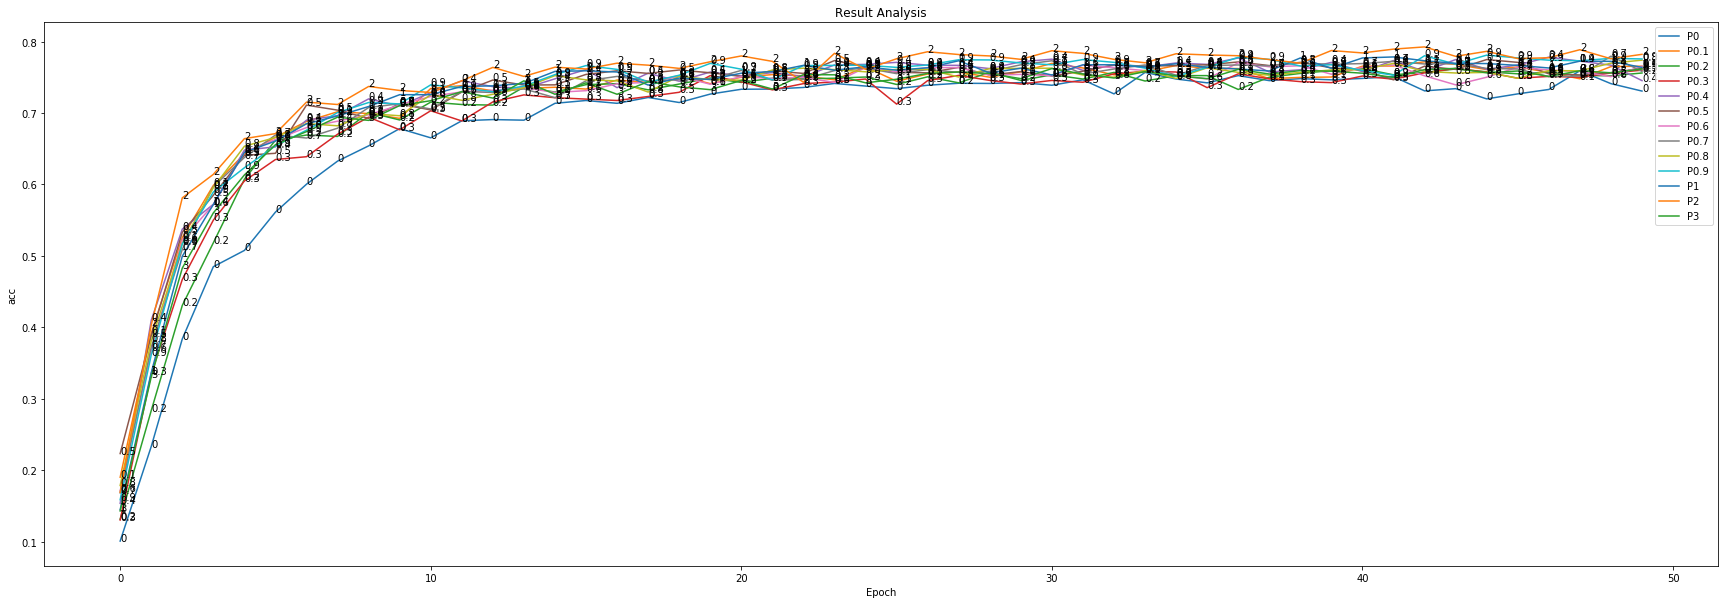

In [28]:
'''
plt.figure(figsize=(30,10))
labels_PERCENT_NOISE = PERCENT_NOISE.copy()
labels_PERCENT_NOISE.insert(0,0)
for history,label in zip(historys_DNN_PERCENT_NOISE,labels_PERCENT_NOISE):
    print(np.mean(history[-6:-1]),label)
    plt.title('Result Analysis')
    plt.plot(range(len(history)),history,label='P'+str(label))
    [plt.annotate(label,(i,history[i])) for i in range(len(history))]
    plt.legend() # 显示图例
plt.xlabel('Epoch')
plt.ylabel('acc')
plt.show()
'''

0.9002527379212972 0
0.903847233889579 0.1
0.9030609379053051 0.2
0.8989609658266179 0.3
0.8954787980469048 0.4
0.9022746419109879 0.5
0.8989609659873044 0.6
0.9055321537253228 0.7
0.8996349339872156 0.8
0.9068800896983641 0.9
0.9055321538458376 1
0.8991294580910587 2
0.8995787699113432 3


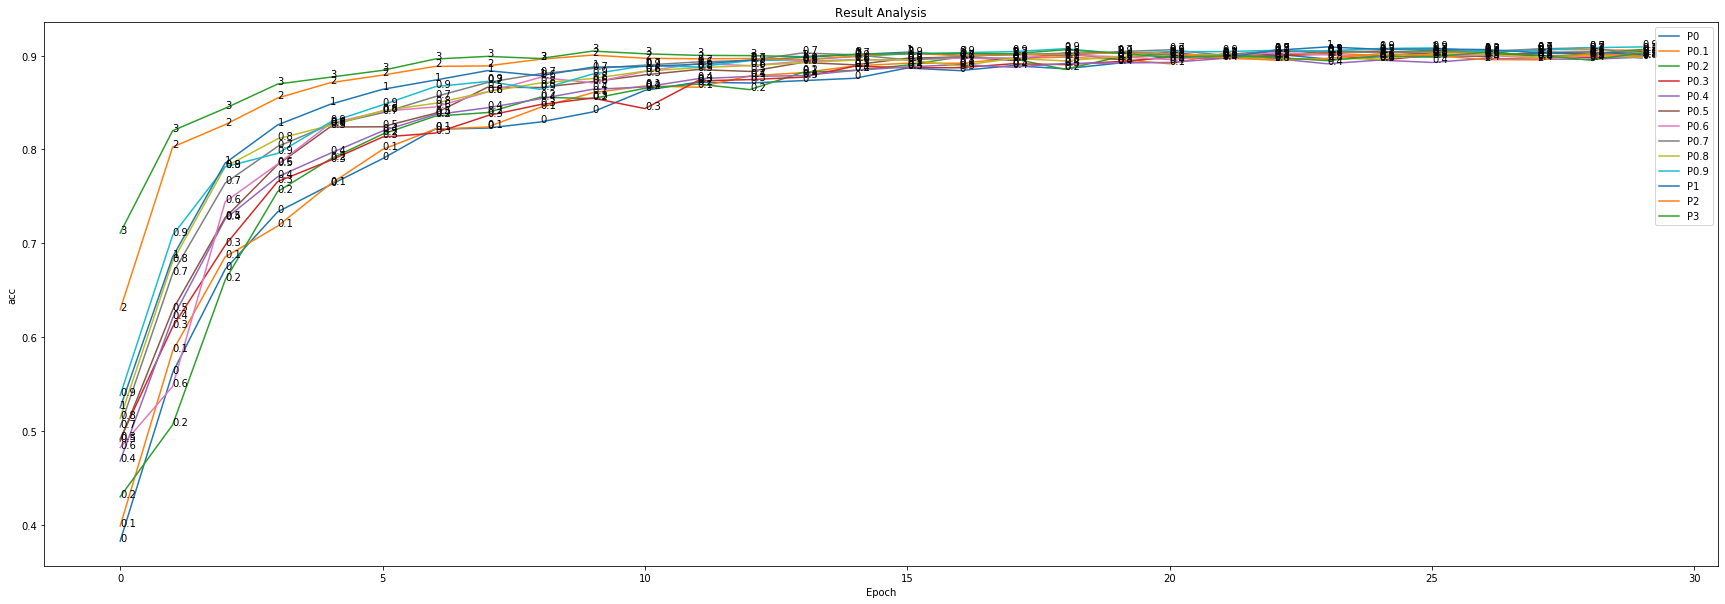

In [29]:
'''
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
labels_NB_TIMES = NB_TIMES.copy()
labels_NB_TIMES.insert(0,0)
for history,label in zip(historys_CNN_NB_TIMES,labels_NB_TIMES):
    print(np.mean(history[-6:-1]),label)
    plt.title('Result Analysis')
    plt.plot(range(len(history)),history,label='P'+str(label))
    [plt.annotate(label,(i,history[i])) for i in range(len(history))]
    plt.legend() # 显示图例
plt.xlabel('Epoch')
plt.ylabel('acc')
plt.show()
'''

0.9023308059199076 0
0.9001965739157253 0.1
0.9062061220265211 0.2
0.9080595336747752 0.3
0.8941308621776403 0.4
0.9099129458653461 0.5
0.8995787700720296 0.6
0.9023869699254796 0.7
0.9040718898449143 0.8
0.8909295141579762 0.9
0.8981185060342822 1
0.8990171299326188 2
0.8995787697071375 3


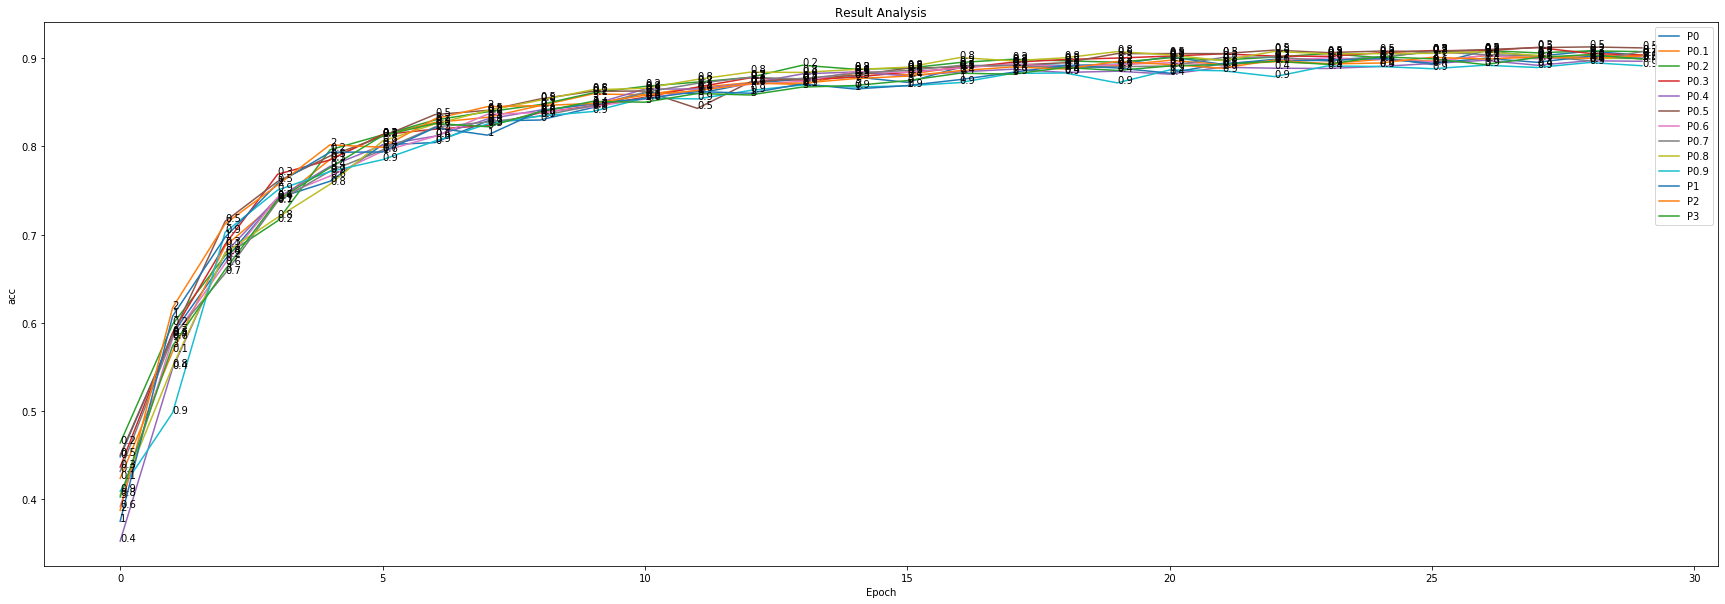

In [30]:
'''
plt.figure(figsize=(30,10))
labels_PERCENT_NOISE = PERCENT_NOISE.copy()
labels_PERCENT_NOISE.insert(0,0)
for history,label in zip(historys_CNN_PERCENT_NOISE,labels_PERCENT_NOISE):
    print(np.mean(history[-6:-1]),label)
    plt.title('Result Analysis')
    plt.plot(range(len(history)),history,label='P'+str(label))
    [plt.annotate(label,(i,history[i])) for i in range(len(history))]
    plt.legend() # 显示图例
plt.xlabel('Epoch')
plt.ylabel('acc')
plt.show()
'''

Pad sequences to  2000
the shape of x_train (6370, 10, 200, 1)
the shape of y_train (6370, 100)
the shape of x_test (2730, 10, 200, 1)
the shape of y_test (2730, 100)

Train on 4459 samples, validate on 1911 samples
Epoch 1/50
4459/4459 [==============================] - 15s 3ms/step - loss: 4.1265 - acc: 0.0363 - val_loss: 3.6646 - val_acc: 0.0780
Epoch 2/50
4459/4459 [==============================] - 6s 1ms/step - loss: 3.4645 - acc: 0.0906 - val_loss: 3.2003 - val_acc: 0.1361
Epoch 3/50
4459/4459 [==============================] - 6s 1ms/step - loss: 3.0512 - acc: 0.1440 - val_loss: 2.8076 - val_acc: 0.2020
Epoch 4/50
4459/4459 [==============================] - 6s 1ms/step - loss: 2.6685 - acc: 0.2274 - val_loss: 2.4220 - val_acc: 0.2904
Epoch 5/50
4459/4459 [==============================] - 6s 1ms/step - loss: 2.2935 - acc: 0.3160 - val_loss: 2.0795 - val_acc: 0.3600
Epoch 6/50
4459/4459 [==============================] - 6s 1ms/step - loss: 1.9309 - acc: 0.4373 - val_loss: 1.79

In [18]:
y_train

array([20, 74, 79, ..., 79, 93, 73])

500